In [1]:
# ms-python.python added
import os
from functools import partial

try:
	os.chdir(os.path.join(os.getcwd(), 'paper_submission'))
	print(os.getcwd())
except:
	pass

/home/fearjm/Projects/larval_gonad/paper_submission


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, ttest_ind



In [3]:
df = pd.read_feather("../output/paper_submission/fig2_data_prop_reads.feather")
cols = df.columns.values
cols[-1] = "values"
df.columns = cols
df["log10_values"] = np.log10(df["values"])
df["log2_values"] = np.log2(df["values"])


In [4]:
def run_mann(x, alternative="less"):
    testis = x.query("tissue == 'testis'")["values"].values
    ovary = x.query("tissue == 'ovary'")["values"].values
    return mannwhitneyu(testis, ovary, alternative=alternative)

def run_ttest(x, alternative="less"):
    testis = x.query("tissue == 'testis'")["values"].values
    ovary = x.query("tissue == 'ovary'")["values"].values
    stat, pval =  ttest_ind(testis, ovary, equal_var=False)
    if alternative == "less":
        if stat < 0:
            return pval / 2
        else:
            return 1 - (pval / 2)
    elif alternative == "greater":
        if stat > 0:
            return pval / 2
        else:
            return 1 - (pval / 2)
        


 # Adult Bulk

In [5]:
adult_bulk = (
    df.query("stage == 'adult' & data_source == 'RNA-Seq'")
    .drop("stage,data_source,cell_type".split(","), axis=1)
)



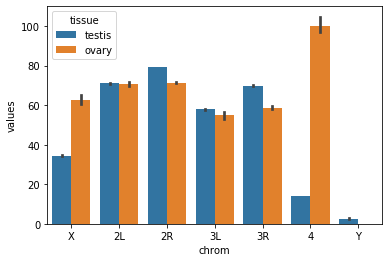

In [6]:
sns.barplot(
    x="chrom", 
    y="values", 
    order="X,2L,2R,3L,3R,4,Y".split(","),
    hue="tissue",
    hue_order=["testis", "ovary"],
    data=adult_bulk)



In [7]:
# Less than
adult_bulk.groupby("chrom").apply(run_ttest)


chrom
2L    0.804753
2R    0.999993
3L    0.950066
3R    0.999978
4     0.000017
X     0.000127
Y     0.999987
dtype: float64

In [8]:
# Greater than
adult_bulk.groupby("chrom").apply(partial(run_ttest, alternative="greater"))



chrom
2L    0.195247
2R    0.000007
3L    0.049934
3R    0.000022
4     0.999983
X     0.999873
Y     0.000013
dtype: float64

 # Larval Bulk

In [9]:
larval_bulk = (
    df.query("stage == 'L3' & data_source == 'RNA-Seq'")
    .drop("stage,data_source,cell_type".split(","), axis=1)
)



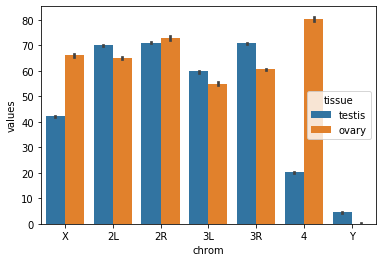

In [10]:
sns.barplot(
    x="chrom", 
    y="values", 
    order="X,2L,2R,3L,3R,4,Y".split(","),
    hue="tissue",
    hue_order=["testis", "ovary"],
    data=larval_bulk)


In [11]:
# Less than
larval_bulk.groupby("chrom").apply(run_ttest)


chrom
2L    9.999995e-01
2R    1.792449e-02
3L    9.999633e-01
3R    9.999999e-01
4     1.142200e-07
X     1.244131e-09
Y     9.999769e-01
dtype: float64

In [12]:
# Greater than
larval_bulk.groupby("chrom").apply(partial(run_ttest, alternative="greater"))

chrom
2L    5.232485e-07
2R    9.820755e-01
3L    3.670162e-05
3R    5.491787e-08
4     9.999999e-01
X     1.000000e+00
Y     2.310710e-05
dtype: float64